# Tutorial
In this notebook, I review basic usage of our python wrapper.  

## Compile python wrapper
First of all, you need to install the python wrapper `pyecl`.
`Eclairs` needs C++ compiler, GSL, and Boost library.
Please make sure that yout Boost library has numpy extension since older versions of Boost do not include it.  
After specifying paths for these libarary in Makefile, codes can be built with `make`.

```
$ make pyeclairs
```

`pip` tries to install the wrapper and then, you can run following scripts.

## Computing matter power spectra based on RegPT 2loop
The basic feature of this code is computing matter power spectra. 
Though Eisenstein-Hu fitting formula is available, the transfer function can be passed from a precomputed table or numpy array computed with other codes, e.g., CAMB or CLASS.  
Here, I use `CLASS` module to compute the transfer function.

In [1]:
import numpy as np
from classy import Class
import pyecl.pyeclairs as pyecl

<frozen importlib._bootstrap>:241: RuntimeWarning: to-Python converter for pyeclairs already registered; second conversion method ignored.


Set cosmological parameters.

In [2]:
# Planck 2015 cosmological parameters

h = 0.6727
omega_b = 0.02225
omega_cdm = 0.1198
n_s = 0.9645
A_s = 2.2065e-9
k_pivot = 0.05
z = 1.0

In [3]:
params_C = {"output": "mPk, mTk",
            "h": h,
            "omega_cdm": omega_cdm,
            "omega_b": omega_b,
            "n_s": n_s,
            "A_s": A_s,
            "z_pk": z,
            'm_ncdm': 0.06,
            'YHe': 'BBN',
            'k_pivot': k_pivot,
            'k_scalar_min_tau0': 1e-05,
            'P_k_max_h/Mpc': 50.0,
            'N_ncdm': 1,
            'T_ncdm': 0.715985,
            'N_eff': 2.03351}

cosmo = Class()
cosmo.set(params_C)
cosmo.compute()

Omega_m = cosmo.Omega_m()
Omega_b = omega_b/(h*h)
H0 = 100.0*h

transfer = cosmo.get_transfer(0.0, "camb")
q = transfer["k (h/Mpc)"]
Tk = transfer["-T_tot/k2"]

Then, set the parameters for `pyecl`. In this example, we will compute the matter power spectrum based on RegPT 2-loop with the direct integration.

In [4]:
params_E = {"H0": H0,
            "Omega_m": Omega_m,
            "Omega_b": Omega_b,
            "ns": n_s,
            "As": A_s,
            "k_pivot": k_pivot,
            "z": z,
            "output": False,
            "direct_mode": True
            }

Pyeclairs = pyecl.pyeclairs()
Pyeclairs.initialize(params_E, q, Tk)

-> showing parameters
H0 = 67.27
Omega_m = 0.315328
Omega_b = 0.0491685
Omega_k = 0
ns = 0.9645
As = 2.2065e-09
w_de = -1
k_pivot = 0.05
m_nu = 0.06
z = 1
transfer_EH = True
transfer_from_file = False
transfer_file_name = 
lambda_power = 2
lambda_bispectrum = 6
free_sigma_d = False
sigma_d = 3
b1 = 1
b2 = 0
bs2 = 0
b3nl = 0
N_shot = 0
sigma_v = 0
use_sigma_vlin = False
alpha_perp = 1
alpha_para = 1
rs_drag_ratio = 1
AP = False
FoG_type = Lorentzian
gamma = 2
multipole_nmu = 50
grid_L = 2048
grid_ng = 256
kmin = 0.0005
kmax = 10
nint = 500
nk_G1_1 = 2000
nk_G1_2 = 500
nk_G2_1 = 100
nx_Pcorr2 = 200
nmu_Pcorr2 = 10
MC_calls = 500000
MC_tol = 0.5
output = False
output_model = RegPT
output_1loop = False
output_file_name = output.dat
output_spacing = linear
output_kmin = 0.01
output_kmax = 0.5
output_nk = 10
direct_mode = True
nk_spl = 1000
direct_nr = 600
direct_nx = 10
direct_nq = 400
direct_nmu = 50
direct_nphi = 50
direct_mumin = -0.999
direct_mumax = 0.999
direct_phimin = 0.00628319
dir

Next, we compute the power spectra. The first argument `k` is the wave-numbers at which power spectra are computed. The second argument specifies density-auto `dd`, density-velocity cross `dt`, and velocity-auto `tt`. The third argument is the model you want to use, i.e. `RegPT` or `SPT`.

In [5]:
# As it may take time, you can reduce the number of k by speeding up.
k = np.linspace(0.01, 0.3, 100)
res = Pyeclairs.get_spectra_2l(k, ["dd", "dt", "tt"], "RegPT")

print(res)

{'dd': array([8438.91041525, 9134.9892377 , 9381.41408838, 9298.85125282,
       8985.42863344, 8523.52294408, 7980.53085788, 7409.7117303 ,
       6849.42044133, 6330.50541888, 5865.04748611, 5461.41748652,
       5121.97567588, 4840.39670855, 4609.0548133 , 4418.00533637,
       4255.80291999, 4112.77988736, 3979.50768902, 3846.92114699,
       3710.67126867, 3566.13770801, 3413.02613746, 3251.72331983,
       3085.38963165, 2917.15979623, 2752.13640864, 2593.11317036,
       2445.45556373, 2309.80035873, 2189.55815415, 2084.901379  ,
       1994.74539205, 1919.49109939, 1855.99059303, 1802.49346641,
       1757.54298178, 1717.09440343, 1679.35728289, 1643.1574341 ,
       1605.72692404, 1565.38279538, 1522.97417203, 1478.37248443,
       1429.51697516, 1379.41212053, 1329.25813695, 1279.53021877,
       1229.90626908, 1183.23628727, 1140.31181031, 1101.30722837,
       1064.82636909, 1032.85938264, 1004.99925574,  981.04629036,
        958.8054763 ,  938.84886311,  920.9710753 ,  90

The computation is done. Let's plot the results with matplotlib.

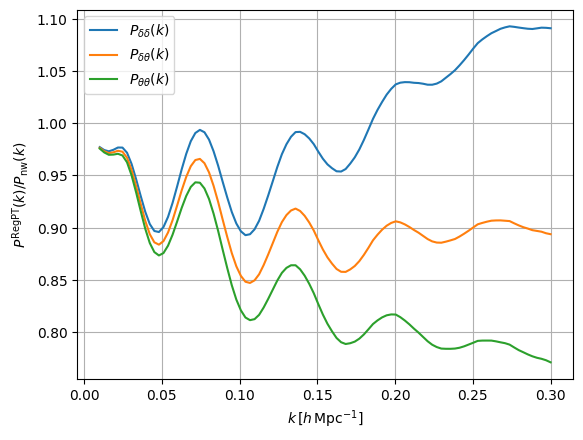

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

Pnw = Pyeclairs.get_Pnowiggle(k)

plt.plot(k, res["dd"]/Pnw, label=r"$P_{\delta \delta} (k)$")
plt.plot(k, res["dt"]/Pnw, label=r"$P_{\delta \theta} (k)$")
plt.plot(k, res["tt"]/Pnw, label=r"$P_{\theta \theta} (k)$")

plt.xlabel(r"$k \, [h \, \mathrm{Mpc}^{-1}]$")
plt.ylabel(r"$P^\mathrm{RegPT} (k) / P_\mathrm{nw} (k)$")
plt.legend()
plt.grid()